# **Лабораторная работа №2**
## **Визуальный анализ данных**
## **Вариант 4: Прогнозирование рака**
**Цель работы**: изучить программные средства, используемые для визуализации наборов данных.

Выполним анализ набора данных: "Прогнозирование рака". Набор данных содержит описание медицинской статистики и образа жизни 1500 пациентов. Разработан для прогнозирования наличия рака на основе различных при- знаков. Набор данных структурирован для предоставления реалистичной задачи для предиктивного моделирования в медицинской области. Набор данных включает следующие атрибуты:
*   Age – целые числа, представляющие возраст пациента, в диапазоне от 20 до
80 лет;
*   Gender – двоичные значения, представляющие пол, где 0 обозначает мужской
пол, а 1 обозначает женский пол;
*   BMI (ИМТ) – непрерывные значения, представляющие индекс массы тела, в
диапазоне от 15 до 40;
*   Smoking – двоичные значения, указывающие на статус курения, где 0 означает
«нет», а 1 означает «да»;
*   GeneticRisk – категориальные значения, представляющие уровни генетического риска развития рака, где 0 обозначает низкий уровень, 1 обозначает средний
уровень и 2 обозначает высокий уровень;
*   PhysicalActivity – непрерывные значения, представляющие количество часов
в неделю, потраченных на физическую активность, в диапазоне от 0 до 10;
*   AlcoholIntake – непрерывные значения, представляющие количество единиц
алкоголя, потребляемых в неделю, в диапазоне от 0 до 5;
*   CancerHistory – двоичные значения, указывающие, есть ли у пациента онкологические заболевания в анамнезе, где 0 означает «нет», а 1 означает «да»;
*   Diagnosis – двоичные значения, указывающие на статус диагноза рака, где 0
означает отсутствие рака, а 1 означает наличие рака (целевая переменная).



## 1. Импортируем необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 2. Импортируем набор данных из файла cancer_data.csv и поместим его в объект DataFrame

In [5]:
data = pd.read_csv("cancer_data.csv")
data.head(10)

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
5,27,0,37.105162,0,1,3.941905,2.324274,0,0
6,80,1,20.701994,0,0,8.482031,3.152943,0,0
7,40,0,20.301121,1,0,4.929827,2.247995,1,0
8,58,1,30.274525,0,1,4.719025,0.943161,1,1
9,77,0,25.275712,0,1,4.903125,2.539487,0,0


## 3. Получим сводную информацию по датафрейму

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


Графики, используемые при анализе данных, делят не по библиотекам, с использованием которых они строятся, а по типам признаков, для анализа которых предназначены графики

## 4. Визуализация количественных признаков

Для представления распределения простого количественного признака подходит обычная гистограмма, содержащаяся во всех библиотеках

<Axes: >

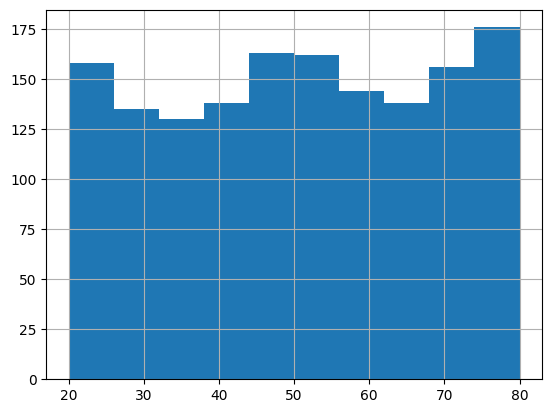

In [7]:
# Применение Pandas для визуализации данных
# Pandas работает как настройка над matplotlib
data['Age'].hist()

Для построения гистограммы вызывается метод hist() класса DataFrame. На самом деле используется метод из библиотеки matplotlib. Метод hist() можно использовать для построения гистограмм по нескольким признакам - data.hist(). При этом неколичественные признаки игнорируются

Изменим размер фигуры и применим метод hist() для визуализации распределения нескольких признаков

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoking'}>,
        <Axes: title={'center': 'GeneticRisk'}>,
        <Axes: title={'center': 'PhysicalActivity'}>],
       [<Axes: title={'center': 'AlcoholIntake'}>,
        <Axes: title={'center': 'CancerHistory'}>,
        <Axes: title={'center': 'Diagnosis'}>]], dtype=object)

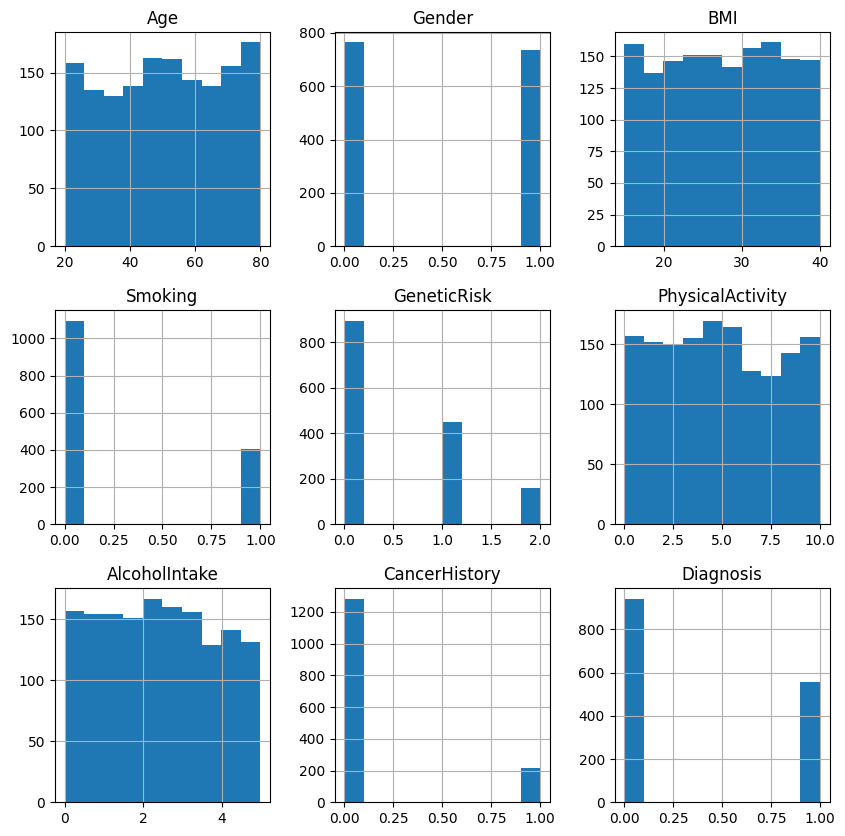

In [8]:
data.hist(figsize=(10,10))

Аналогичный тип графика можно получить с использованием matplotlib

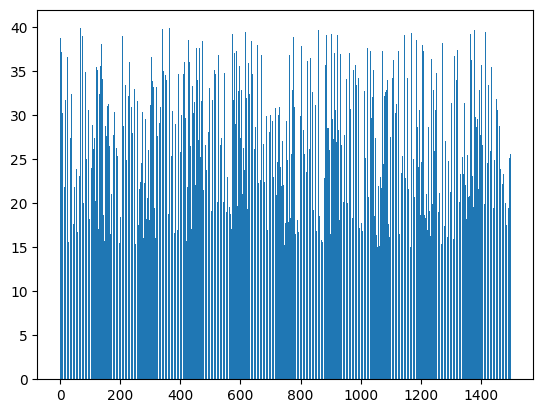

In [9]:
plt.bar(data.index, data["BMI"])
plt.show()

<BarContainer object of 61 artists>

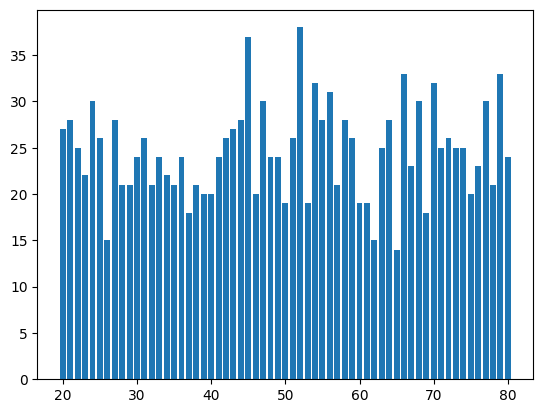

In [10]:
hist = data["Age"].value_counts()
plt.bar(hist.index, hist)

<Axes: ylabel='BMI'>

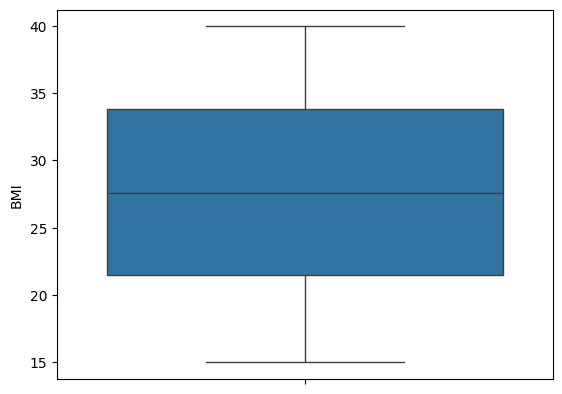

In [11]:
# использование Seaborn
# Построение диаграммы типа "ящик с усами"
# По диаграмме можно определить медиану, квартили,
# интерквартильный размах, выбросы
sns.boxplot(data["BMI"])

Ниже представлен код и результат построения графиков для анализа потребления алкоголя по полу.

<Axes: xlabel='Gender', ylabel='AlcoholIntake'>

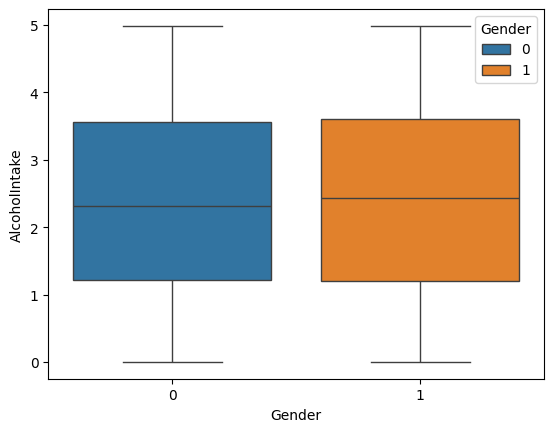

In [16]:
top_data = data[["Gender", "AlcoholIntake"]]
top_data = top_data.groupby("Gender").sum()
top_data = top_data.sort_values("AlcoholIntake", ascending=False)
top_data = top_data[:2].index.values
sns.boxplot(y="AlcoholIntake", x="Gender",
           data=data[data.Gender.isin(top_data)], hue="Gender")

## 5. Визуализация категориальных признаков

К категориальным признакам относятся: Gender, Smoking, GeneticRisk, CanserHistory, Diagnosis. Ниже представлены графики типа countplot() из библиотеки seaborn, котороые строят гистограммы, но не по сырым данным, а по рассчитанному количеству разных значений признака.

In [ ]:
# Курение (0 - нет, 1 - да)
data["Smoking"].value_counts()

,count
Smoking,
0,1096
1,404


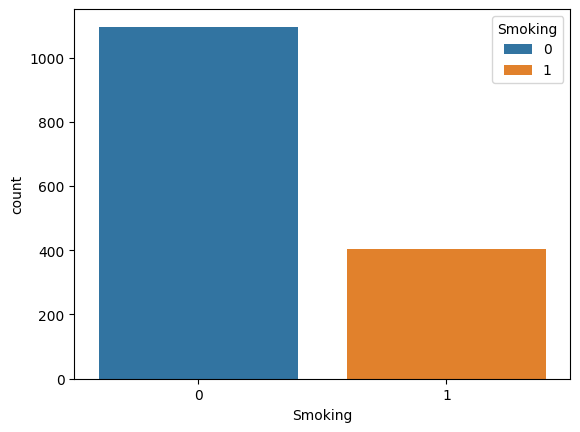

In [ ]:
sns.countplot(data, x="Smoking", hue="Smoking")
plt.show()

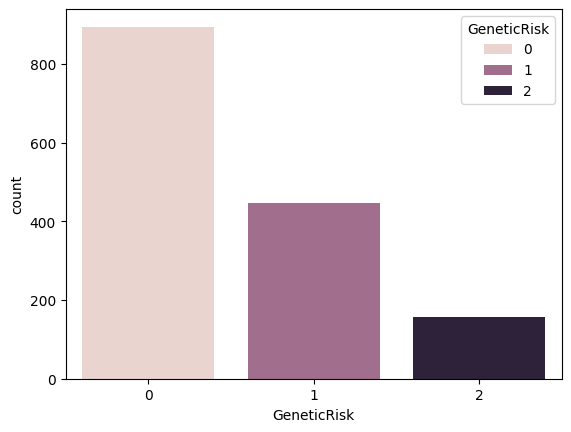

In [ ]:
# гистограмма уровней генетического риска (0 - низкий уровень, 1 - средний уровень, 2 - высокий уровень)
sns.countplot(data[data["GeneticRisk"].isin(data["GeneticRisk"].value_counts().head(3).index)],
             x="GeneticRisk", hue="GeneticRisk")
plt.show()

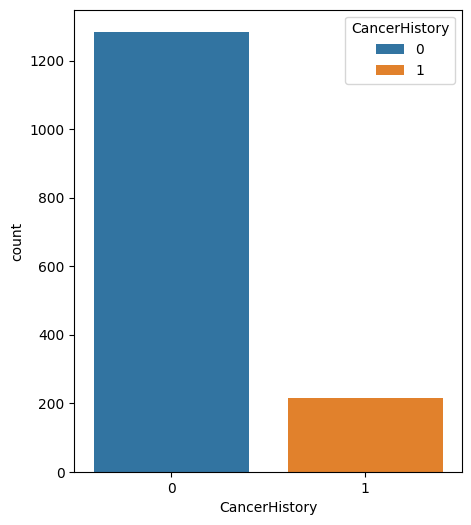

In [ ]:
# гистограмма наличия заболевания в анамнезе
fig = plt.subplots(figsize=(5,6))
sns.countplot(data, x="CancerHistory", hue="CancerHistory")
plt.show()

<BarContainer object of 2 artists>

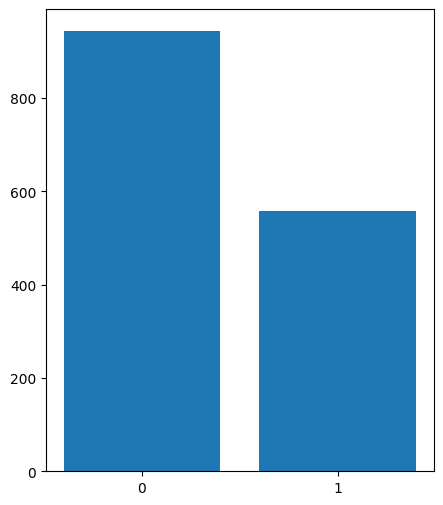

In [ ]:
# статус диагноза рака (0 - отсутствует, 1 - присутствует)
fig = plt.subplots(figsize=(5, 6))
hist = data["Diagnosis"].value_counts()
plt.bar(hist.index.astype(str), hist)

## 6. Визуализация взаимосвязанных признаков

Рассмотрим пример, демонстирурющий сравнение распределений показателей, связанных с характеристиками образа жизни и демографии пациента, которые имеют сильное влияние на его общее состояние здоровья и риск развития хронических заболеваний. Можно сказать, что все показатели, содержащие подстроку «A» в имени показателя. Ниже представлен код для отбора требуемых показателей.

In [ ]:
# список колонок
data.columns

Index(['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity',
       'AlcoholIntake', 'CancerHistory', 'Diagnosis'],
      dtype='object')

In [ ]:
# Отбор числовых признаков, содержащих подстроку "A"
feats = [f for f in data.columns if "A" in f]
feats

['Age', 'PhysicalActivity', 'AlcoholIntake']

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'PhysicalActivity'}>],
       [<Axes: title={'center': 'AlcoholIntake'}>, <Axes: >]],
      dtype=object)

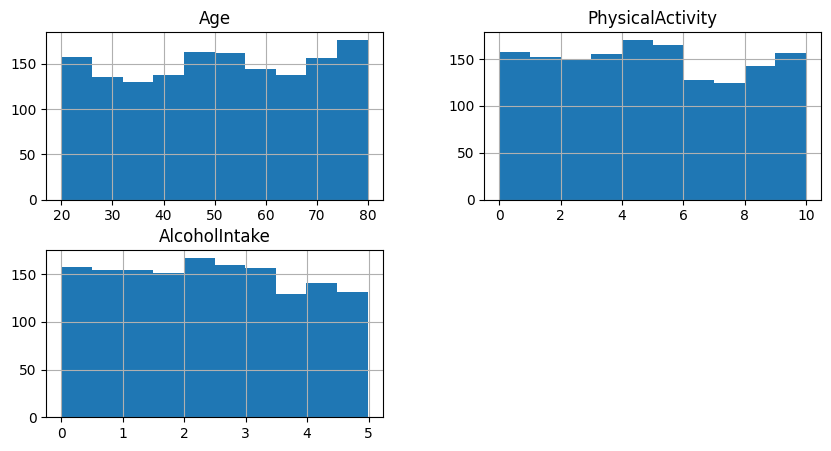

In [ ]:
# строим отдельные гистограммы
# для нескольких признаков
data[feats].hist(figsize=(10, 5))

Часто используют попарное сравнение признаков для обеспечения широкого взгляда на набор данных. На диагональных графиках представлены гистограммы распределения отдельного признака, на недиагональных позициях - попарные распределения

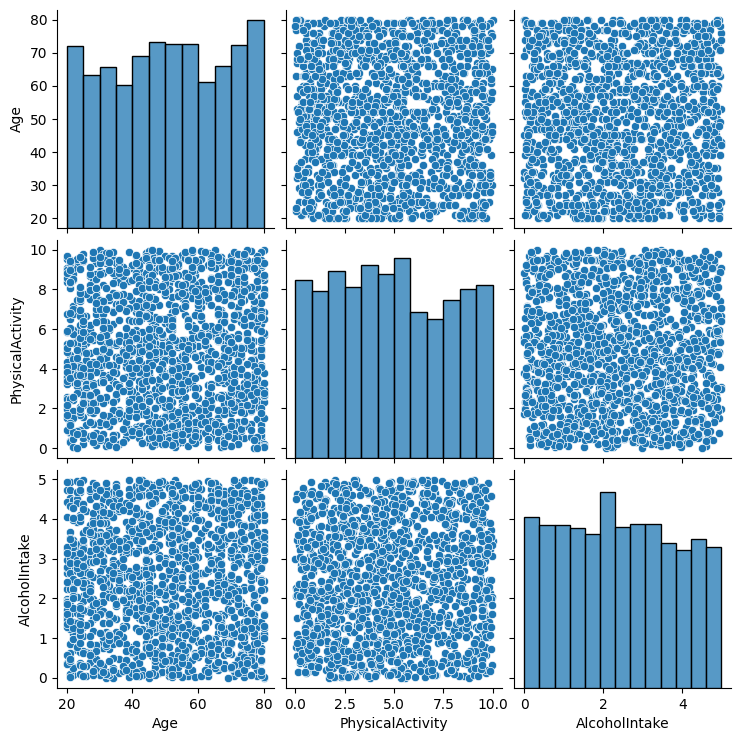

In [ ]:
# Попарное распределение признаков
# Применение Seaborn
sns.pairplot(data[feats])

Можно реализовать более сложные графики. Например, если требуется добавить к существующим признакам, целевой признак Gender (пол) и раскрасить типы элементов, то можно воспользоваться попарными распределениями, но с отображением подмножеств отказов.

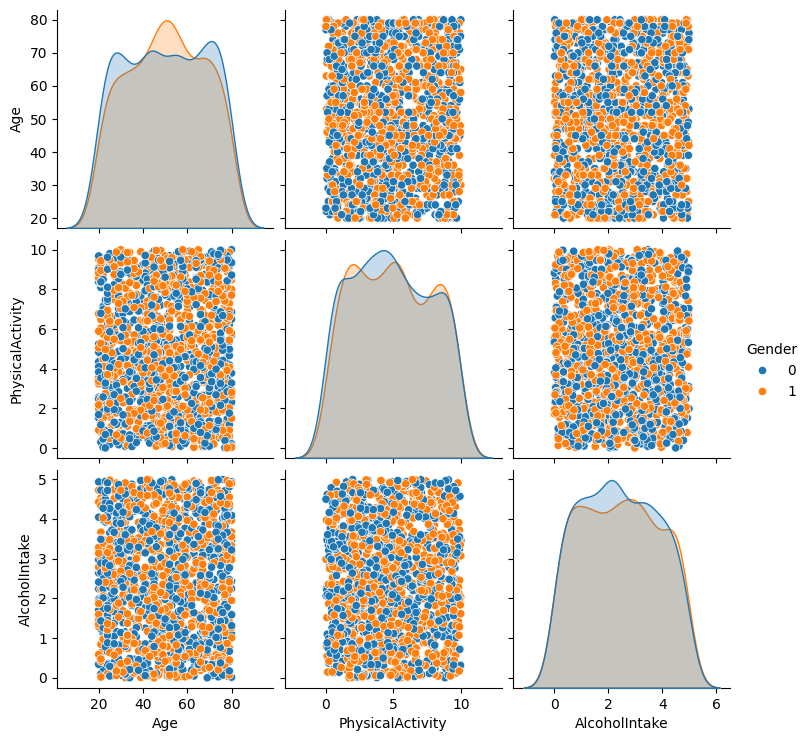

In [ ]:
sns.pairplot(data[feats + ["Gender"]], hue="Gender")

Использование matplotlib, подписей данных, заголовков. Использование простейших пользовательских цветов

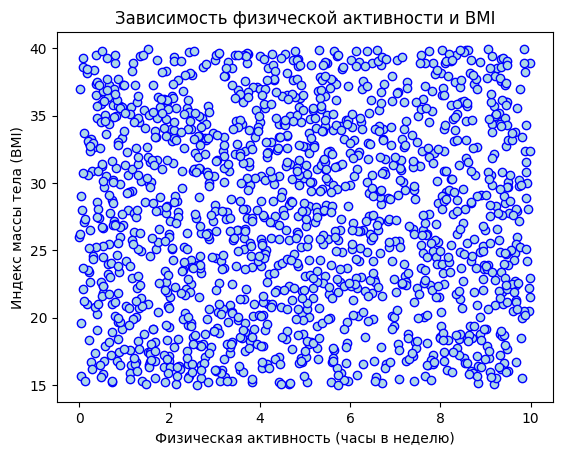

In [ ]:
plt.scatter(data["PhysicalActivity"],
           data["BMI"],
           color="lightblue", edgecolors="blue")
plt.xlabel("Физическая активность (часы в неделю)")
plt.ylabel("Индекс массы тела (BMI)")
plt.title("Зависимость физической активности и BMI")
plt.show()

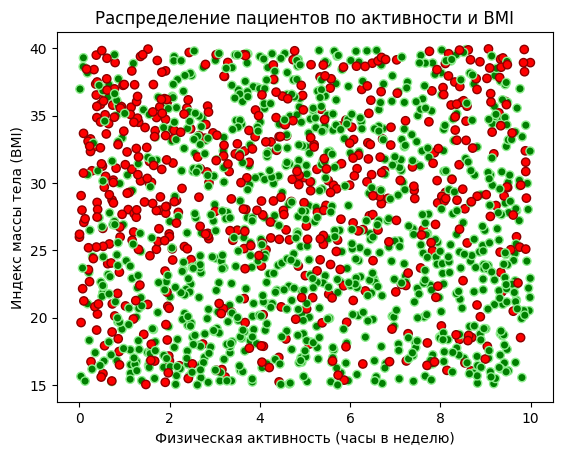

In [ ]:
# Раскрашивание данных
# Цвет в зависимости от диагноза (0 - нет рака, 1 - есть рак)
c = data["Diagnosis"].map({0: "green", 1: "red"})
edge_c = data["Diagnosis"].map({0: "lightgreen", 1: "darkred"})
# Настройка графика
plt.scatter(data["PhysicalActivity"], data["BMI"],
           color=c, edgecolors=edge_c)
plt.xlabel("Физическая активность (часы в неделю)")
plt.ylabel("Индекс массы тела (BMI)")
plt.title("Распределение пациентов по активности и BMI")
plt.show()

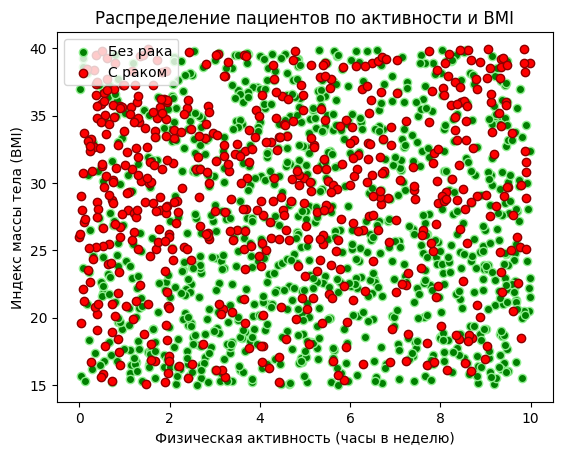

In [ ]:
# Раскраска по диагнозу рака
# 0 — нет рака, 1 — рак

# Пациенты без рака
data_no_cancer = data[data["Diagnosis"] == 0]
# Пациенты с раком
data_cancer = data[data["Diagnosis"] == 1]

plt.scatter(data_no_cancer["PhysicalActivity"],
            data_no_cancer["BMI"],
            color="green",
            edgecolors="lightgreen",
            label="Без рака"
            )
plt.scatter(data_cancer["PhysicalActivity"],
            data_cancer["BMI"],
            color="red",
            edgecolors="darkred",
            label="С раком"
            )
plt.xlabel("Физическая активность (часы в неделю)")
plt.ylabel("Индекс массы тела (BMI)")
plt.title("Распределение пациентов по активности и BMI")
plt.legend()

## 7. Корреляция признаков

В реальных задачах машинного обучения при первичном анализе данных необходимо выявить корреляции признаков обучающей выборки. В пакете Pandas имеется встроенный инструмент для этого - метод corr() класса DataFrame. Ниже показан результат вывода этой функции.

In [ ]:
data.corr(numeric_only=True)

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
Age,1.000000,0.007145,0.030246,-0.013914,-0.027025,0.016396,0.003209,-0.010996,0.196603
Gender,0.007145,1.000000,-0.012516,0.035384,-0.004674,0.023401,0.009723,0.007657,0.250336
BMI,0.030246,-0.012516,1.000000,-0.012616,0.011392,0.011480,0.004711,-0.010824,0.187560
Smoking,-0.013914,0.035384,-0.012616,1.000000,-0.021039,-0.043817,-0.001660,0.016368,0.226999
GeneticRisk,-0.027025,-0.004674,0.011392,-0.021039,1.000000,-0.039721,-0.016864,-0.010833,0.253472
PhysicalActivity,0.016396,0.023401,0.011480,-0.043817,-0.039721,1.000000,0.033856,0.018136,-0.150089
AlcoholIntake,0.003209,0.009723,0.004711,-0.001660,-0.016864,0.033856,1.000000,0.055403,0.212772
CancerHistory,-0.010996,0.007657,-0.010824,0.016368,-0.010833,0.018136,0.055403,1.000000,0.392188
Diagnosis,0.196603,0.250336,0.187560,0.226999,0.253472,-0.150089,0.212772,0.392188,1.000000


Полученная матрица имеет размер 12×12. Это незначительный размер (в реальных задачах машинного обучения размеры матриц корреляции имеют порядки 106-1010 и более), но даже для матрицы рассматриваемого набора данных проанализировать корреляцию признаков вручную - трудоемкая задача. Можно использовать скрипты, для выделения больших коэффициентов корреляции. Но лучше использовать специальный тип графика - heatmap

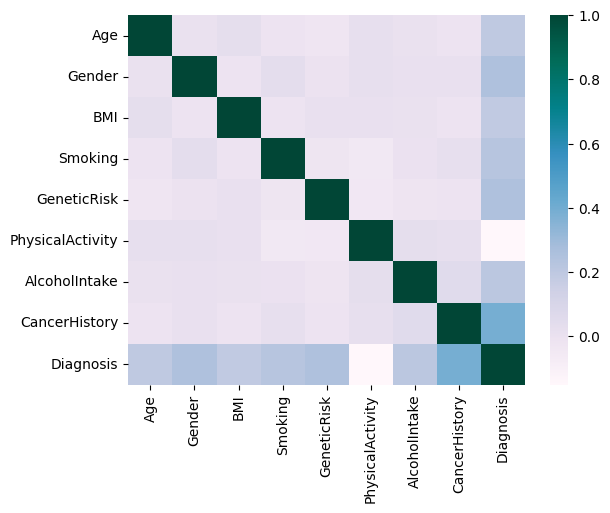

In [ ]:
sns.heatmap(data.corr(numeric_only=True), cmap=plt.cm.PuBuGn)
plt.show()

Коррелирующие признаки обычно удаляются и не рассматриваются в процессе обучения. Из карты heatmap видно, что некоторые признаки коррелируют: например, умеренная корреляция в парах (CancerHistory, Diagnosis), и небольшая отрицательная корреляция (AlcoholIntake, PhysicalActivity). Из таких пар можно удалить один признак

In [ ]:
high_corr = ["CancerHistory", "PhysicalActivity"]
data_uncorr = data.drop(high_corr, axis=1)
data_uncorr.columns

Index(['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'AlcoholIntake',
       'Diagnosis'],
      dtype='object')

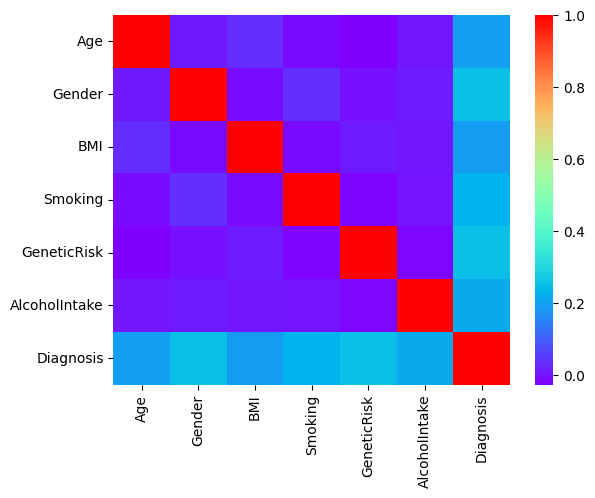

In [ ]:
sns.heatmap(data_uncorr.corr(numeric_only=True), cmap=plt.cm.rainbow)
plt.show()